In [7]:
from modsim import *

In [8]:
init = State(y=381, v=0)
init

y    381
v      0
Name: state, dtype: int64

In [9]:
system = System(init=init, g=9.8, t_end=10)
system

namespace(init=y    381
               v      0
               Name: state, dtype: int64,
          g=9.8,
          t_end=10)

$$\frac{d y}{d t} = v $$
$$\frac{d v}{d t} = a = - g$$

In [10]:
def slope_func(t, state, system):
    y, v = state
    dydt = v
    dvdt = -system.g
    return dydt, dvdt

In [11]:
slope_func(0, init, system)

(0, -9.8)

In [12]:
results, details = run_solve_ivp(system, slope_func)
details.message

'The solver successfully reached the end of the integration interval.'

In [13]:
results.head()

,y,v
0.0,381.000,0.00
0.1,380.951,-0.98
0.2,380.804,-1.96
0.3,380.559,-2.94
0.4,380.216,-3.92


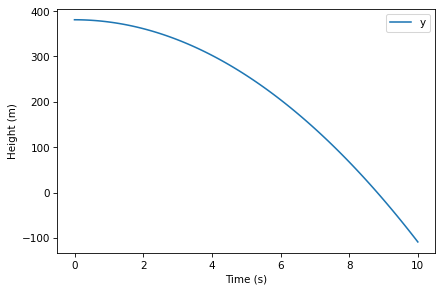

In [14]:
results.y.plot()
decorate(xlabel='Time (s)', ylabel='Height (m)')

In [15]:
t_crossings = crossings(results.y, 0)
t_crossings

array([8.81788535])

In [16]:
def event_func(t, state, system):
    y, v = state
    return y

In [17]:
results, details = run_solve_ivp(system, slope_func, events=event_func)
details.message

'A termination event occurred.'

In [18]:
y, v = results.iloc[-1]
y, v

(0.0, -86.41527642726145)

### Exercise 20.1

Here’s a question from the website Ask an Astronomer (http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate): “If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun’s gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed.” Use run_solve_ivp to answer this question.
Here are some suggestions about how to proceed:

1. Look up the law of universal gravitation and any constants you need. I suggest you work entirely in SI units: meters, kilograms, and newtons.

2. When the distance between the Earth and the Sun gets small, this system behaves badly, so you should use an event function to stop when the surface of Earth reaches the surface of the Sun.
3. Express your answer in days, and plot the results as millions of kilometers versus days.


If you read the reply by Dave Rothstein, you will see other ways to solve the problem, and a good discussion of the modeling decisions behind them.

You might also be interested to know that it’s not that easy to get to the Sun; see https://www.theatlantic.com/science/archive/2018/08/parker-solar-probe-launch-nasa/567197.

https://web.archive.org/web/20180617133223/http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate#:~:text=It%20would%20take%20about%20two,as%20it%20continued%20to%20fall).


In [19]:
# average distance between the Sun and the Earth is 1AU = 149,597,871 km
# The gravitational constant G = 6.6743×10−11 N⋅m2/kg2
# The mass of the Sun is 1.989 × 10^30 kg
M_sun = 1.989e30 # kg
# The mass of the Earth is 5.972 × 10^24 kg
M_earth = 5.972e24 # kg
# The radius of the Sun is 695,700 km
R_sun = 695700 # km
# The radius of the Earth is 6,378 km
R_earth = 6378 # km
# The distance between the Earth and the Sun is 1AU = 149,597,871 km
AU = 149597871 # km
# Gravity of the Sun = G * mass of the Sun / distance^2
def gravity_of_sun(distance_in_km):
    distance = distance_in_km * 1000 # m
    G = 6.6743e-11 # N⋅m2/kg2
    return G * M_sun / distance**2
# Gravity of the Sun at the surface is 274 m/s^2
g_sun = gravity_of_sun(R_sun)
# Total distance between the Sun and the Earth
travel_distance = AU - R_sun - R_earth # km, distance between surface of the Sun and the Earth
g_sun, travel_distance

(274.2814900104337, 148895793)

In [58]:
init = State(y=AU, v=0)
system = System(init=init, t_end=150, travel_distance=travel_distance, gravity=gravity_of_sun)
system

namespace(init=y    149597871
               v            0
               Name: state, dtype: int64,
          t_end=150,
          travel_distance=148895793,
          gravity=<function __main__.gravity_of_sun(distance_in_km)>)

In [59]:
system.gravity(AU) / 1000 * 3600 * 24 * 3600 * 24

44280.97409133836

In [69]:
def slope_func(t, state, system):
    y, v = state
    dydt = v
    dvdt = -system.gravity(y) / 1000 * 3600 * 24 * 3600 * 24 # convert m/s^2 to km/day^2
    return dydt, dvdt

def event_func(t, state, system):
    y, v = state
    return y - R_sun - R_earth

In [70]:
results, details = run_solve_ivp(system, slope_func, events=event_func)
details.message


'A termination event occurred.'

In [71]:
len(results), results.head(), results.tail()

(101,
                      y              v
 0.000000  1.495979e+08       0.000000
 0.645507  1.495886e+08  -28584.866237
 1.291015  1.495610e+08  -57176.785371
 1.936522  1.495148e+08  -85782.819944
 2.582029  1.494502e+08 -114410.103740,
                       y             v
 61.968698  2.974229e+07 -7.310619e+06
 62.614205  2.476096e+07 -8.175634e+06
 63.259712  1.908627e+07 -9.522115e+06
 63.905220  1.219964e+07 -1.221826e+07
 64.550727  7.020780e+05 -5.302346e+07)

<Axes: >

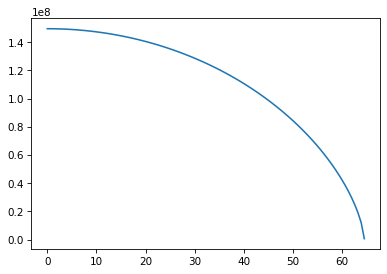

In [72]:
results.y.plot()

In [73]:
results.iloc[-1]

y    7.020780e+05
v   -5.302346e+07
Name: 64.55072681826893, dtype: float64

It will take 64.5 days.